# **Librairies**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as math
import seaborn as sns


# **Mount Google Drive (for google colab users only !)**

Si vous utilisez Google Colab, 
Merci de copier les données dans le répertoire : 
My Drive/Colab Notebooks/Openclassroom/

In [10]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

import os

dir = "/content/drive/My Drive/Colab Notebooks/Openclassroom/"
os.chdir(dir)

#!ls


Mounted at /content/drive/


# **Load data**

iris : 150 individus, iris_dna : 146 individus


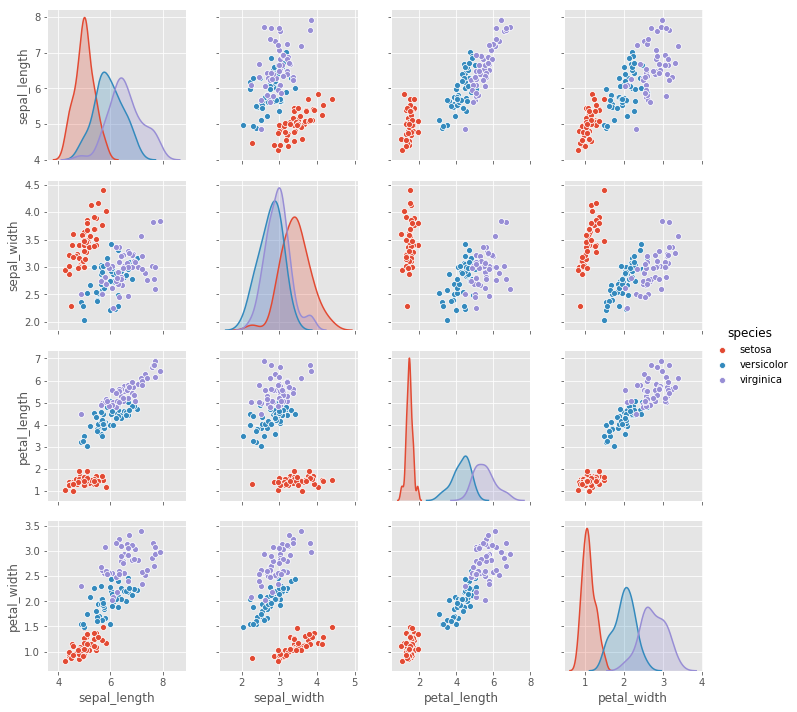

In [26]:
# Chargement
iris = pd.read_csv("iris_dataset.csv")

# On renomme les colonnes
iris.columns = ["id","sepal_length","sepal_width","petal_length","petal_width","species"]

# On supprime l'identifiant des iris
del iris["id"]

# On supprime les individus contenant au moins une valeur manquante
iris_dna = iris.dropna(axis=0, how='any')
print("iris : {} individus, iris_dna : {} individus".format(len(iris),len(iris_dna)))

# Affichage des diagrammes de dispersion
sns.pairplot(iris_dna,hue="species")
plt.show()


# **Split features : One for each species**

In [0]:
iris_setosa = iris_dna[iris_dna["species"] == "setosa"]
iris_virginica = iris_dna[iris_dna["species"] == "virginica"]
iris_versicolor = iris_dna[iris_dna["species"] == "versicolor"]


# Q1 :

Sur le dataframe iris_dna, calculez les coefficients de corrélation linéaires suivants :
- petal_width en fonction de petal_length
- sepal_width en fonction de petal_width

# **Q2 :**

Commentez les résultats de la question 1 grâce aux 2 diagrammes de dispersion donnés dans l'énoncé.

Ensuite, gardez en tête le coefficient de corrélation linéaire de sepal_width en fonction de petal_width. Celui-ci est calculé sur l'ensemble des iris. Quand on calcule les coefficients de corrélation linéaire de ces mêmes variables, mais en les séparant par espèce, on obtient les résultats suivants :

    sepal_width en fonction de petal_width sur iris_setosa : 0.753

    sepal_width en fonction de petal_width sur iris_virginica : 0.685

    sepal_width en fonction de petal_width sur iris_versicolor : 0.825

NB : vous n'avez pas besoin de refaire ce calcul

Comparez (dans votre tête) ces 3 résultats à celui obtenu sur l'ensemble des iris (question 1).
NB: vous n'avez pas à répondre à cette question dans votre rendu

# **Q3 :**

Réalisez 4 régressions linéaires (avec la méthode des moindres carrés). Nous utiliserons la notation suivante : Y = aX + b + epsilon

a et b sont les réels que vous devez estimer, epsilon le terme d'erreur (vous n'avez pas à vous en soucier), X et Y sont 2 variables.

Les 4 régressions linéaires correspondent à chacun de ces 4 cas :
cas 1/ X est la variable petal_length et Y la variable petal_width, sur le dataframe iris_dna
cas 2/ X est la variable petal_width et Y la variable sepal_width, sur le dataframe iris_setosa
cas 3/ X est la variable petal_width et Y la variable sepal_width, sur le dataframe iris_virginica
cas 4/ X est la variable petal_width et Y la variable sepal_width, sur le dataframe iris_versicolor
Remarque : ce sont les 4 cas que nous étudions depuis le début.

Donnez pour chacun des ces 4 cas les estimations de a et de b.

# **Q4 :**

Voici les 4 lignes contenant des données manquantes : (cf énoncé original)

Pour chaque individu, la valeur manquante se trouve soit dans la variable petal_width soit dans la variable sepal_width. Dans ces 2 cas, on peut imputer (remplir) ces valeurs grâce aux régressions linéaires que nous avons étudiées précédemment. Ces valeurs seront approchées mais fausses.
En supposant qu'un individu n'a jamais plus d'une valeur manquante, voici le code qui remplace les valeurs manquantes grâce aux régressions linéaires. Des bouts de code ont été supprimés et remplacés par "[...]" : à vous de les retrouver. 

In [0]:
coeffs = {
    "cas 1" : {'a': [...] , 'b':[...]},
    "cas 2" : {'a': [...] , 'b':[...]},
    "cas 3" : {'a': [...] , 'b':[...]},
    "cas 4" : {'a': [...] , 'b':[...]},
}
lignes_modifiees = []

for (i,individu) in iris.iterrows(): # pour chaque individu de iris,...
    if pd.isnull(individu["petal_width"]): #... on test si individu["petal_width"] est nul.
        a = coeffs["cas 1"]['a']
        b = coeffs["cas 1"]['b']
        X = individu["petal_length"]
        Y = a*X + b
        iris.loc[i,"petal_width"] = Y # on remplace la valeur manquante par Y
        lignes_modifiees.append(i)
        print("On a complété petal_width par {} a partir de petal_length={}".format(Y,X))
        
    if pd.isnull(individu["sepal_width"]):
        espece = individu["species"]
        X = individu["petal_width"]
        [...]
        lignes_modifiees.append(i)
        print("On a complété sepal_width par {} a partir de l'espece:{} et de petal_width={}".format(Y,espece,X))

# **Synthèse des résultats**

# **Conclusion**